In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pib = pd.read_csv('pib.csv')
pop = pd.read_csv('população.csv')
ids = pd.read_excel('acp_codigos.xls')

In [3]:
pib.head()

,Município,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita
0,350010 Adamantina,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,423727.0,2.0,444790.0,8.0,531900.0,0.0,558184.0,5.0
1,350020 Adolfo,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,77348.0,1.0,70544.0,2.0,68428.0,4.0,102877.0,2.0
2,350030 Aguaí,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,690819.0,6.0,576466.0,7.0,476557.0,7.0,612384.0,2.0
3,350040 Águas da Prata,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,91567.0,9.0,120911.0,5.0,192819.0,4.0,226762.0,1.0
4,350050 Águas de Lindóia,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,136718.0,8.0,146472.0,5.0,172776.0,7.0,197044.0,9.0


In [4]:
pop.head()

,Município,2003,2004,2005,2006,2007,2008,2009,2010
0,350010 Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0
1,350020 Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0
2,350030 Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0
3,350040 Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0
4,350050 Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0


In [5]:
inf = pib['Município'].str.split(" ", n = 1, expand=True)
inf2 = pop['Município'].str.split(" ", n = 1, expand=True)

In [6]:
pib['ID'] = inf[0]
pib['Município'] = inf[1]
pop['ID'] = inf2[0]
pop['Município'] = inf2[1]

In [7]:
anos = ['2003','2004','2005', '2006','2007','2008','2009','2010']
ids[ids['Nome_mun']=='São Paulo']

,UF,ACP,NOME_ACP,codmun,Nome_mun
193,35,350101,ACP de São Paulo,3550308,São Paulo


In [8]:
ids['codmun'] = ids['codmun'].apply(str)
ids['codmun'] = ids['codmun'].str.slice(stop=6)

In [9]:
ids.columns = ['UF','ACP','NOME_ACP','ID','Nome_mun']
ids

,UF,ACP,NOME_ACP,ID,Nome_mun
0,13,130100,ACP de Manaus,130260,Manaus
1,15,150100,ACP de Belém,150080,Ananindeua
2,15,150100,ACP de Belém,150130,Barcarena
3,15,150100,ACP de Belém,150140,Belém
4,15,150100,ACP de Belém,150150,Benevides
...,...,...,...,...,...
330,53,530100,ACP de Brasília,521560,Padre Bernardo
331,53,530100,ACP de Brasília,521760,Planaltina
332,53,530100,ACP de Brasília,521975,Santo Antônio do Descoberto
333,53,530100,ACP de Brasília,522185,Valparaíso de Goiás


In [10]:
pop

,Município,2003,2004,2005,2006,2007,2008,2009,2010,ID
0,Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,350010
1,Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,350020
2,Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,350030
3,Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,350040
4,Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,350050
...,...,...,...,...,...,...,...,...,...,...
642,Votorantim,100603.0,102083.0,105446.0,107157.0,108851.0,104413.0,105190.0,108809.0,355700
643,Votuporanga,79026.0,80100.0,82527.0,83762.0,84994.0,80819.0,81277.0,84692.0,355710
644,Zacarias,1947.0,1947.0,1941.0,1940.0,1946.0,2384.0,2425.0,2335.0,355715
645,None,38709339.0,39239362.0,40442820.0,41055761.0,41663568.0,41011635.0,41384089.0,41262199.0,Total


In [11]:
ids['ID'] = ids['ID'].astype(float)
pop = pop.drop([645,646], axis=0)
pop['ID'] = pop['ID'].astype(float)

In [12]:
ids = ids[['ID','UF','ACP','NOME_ACP','Nome_mun']]

In [13]:
pop_ = ids.merge(pop, left_on='ID',right_on='ID')
pop_

,ID,UF,ACP,NOME_ACP,Nome_mun,Município,2003,2004,2005,2006,2007,2008,2009,2010
0,350115.0,35,350101,ACP de São Paulo,Alumínio,Alumínio,15712.0,15856.0,16189.0,16358.0,16523.0,16331.0,16430.0,16839.0
1,350275.0,35,350101,ACP de São Paulo,Araçariguama,Araçariguama,12459.0,12869.0,13803.0,14281.0,14756.0,13027.0,13206.0,17080.0
2,350390.0,35,350101,ACP de São Paulo,Arujá,Arujá,65825.0,67924.0,72696.0,75119.0,77530.0,78960.0,80925.0,74905.0
3,350410.0,35,350101,ACP de São Paulo,Atibaia,Atibaia,118989.0,121418.0,126942.0,129754.0,132538.0,125418.0,126754.0,126603.0
4,350570.0,35,350101,ACP de São Paulo,Barueri,Barueri,232148.0,239697.0,256825.0,265547.0,274199.0,264619.0,270172.0,240749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,350460.0,35,350300,ACP de São José do Rio Preto,Bady Bassitt,Bady Bassitt,13348.0,13915.0,15204.0,15861.0,16515.0,13898.0,14126.0,14603.0
95,351130.0,35,350300,ACP de São José do Rio Preto,Cedral,Cedral,7007.0,7104.0,7325.0,7437.0,7552.0,8119.0,8264.0,7972.0
96,351750.0,35,350300,ACP de São José do Rio Preto,Guapiaçu,Guapiaçu,15138.0,15472.0,16231.0,16617.0,17002.0,17593.0,17934.0,17869.0
97,353030.0,35,350300,ACP de São José do Rio Preto,Mirassol,Mirassol,51112.0,51993.0,53988.0,55009.0,56017.0,54350.0,54922.0,53792.0


In [14]:
pop_['NOME_ACP'] = pop_['NOME_ACP'].str.slice(start=6)
pop_

,ID,UF,ACP,NOME_ACP,Nome_mun,Município,2003,2004,2005,2006,2007,2008,2009,2010
0,350115.0,35,350101,São Paulo,Alumínio,Alumínio,15712.0,15856.0,16189.0,16358.0,16523.0,16331.0,16430.0,16839.0
1,350275.0,35,350101,São Paulo,Araçariguama,Araçariguama,12459.0,12869.0,13803.0,14281.0,14756.0,13027.0,13206.0,17080.0
2,350390.0,35,350101,São Paulo,Arujá,Arujá,65825.0,67924.0,72696.0,75119.0,77530.0,78960.0,80925.0,74905.0
3,350410.0,35,350101,São Paulo,Atibaia,Atibaia,118989.0,121418.0,126942.0,129754.0,132538.0,125418.0,126754.0,126603.0
4,350570.0,35,350101,São Paulo,Barueri,Barueri,232148.0,239697.0,256825.0,265547.0,274199.0,264619.0,270172.0,240749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,350460.0,35,350300,São José do Rio Preto,Bady Bassitt,Bady Bassitt,13348.0,13915.0,15204.0,15861.0,16515.0,13898.0,14126.0,14603.0
95,351130.0,35,350300,São José do Rio Preto,Cedral,Cedral,7007.0,7104.0,7325.0,7437.0,7552.0,8119.0,8264.0,7972.0
96,351750.0,35,350300,São José do Rio Preto,Guapiaçu,Guapiaçu,15138.0,15472.0,16231.0,16617.0,17002.0,17593.0,17934.0,17869.0
97,353030.0,35,350300,São José do Rio Preto,Mirassol,Mirassol,51112.0,51993.0,53988.0,55009.0,56017.0,54350.0,54922.0,53792.0


In [15]:
pib = pib.drop([645,646], axis=0)
pib['ID'] = pib['ID'].astype(float)

In [16]:
pib_ = ids.merge(pib, left_on='ID',right_on='ID')
pib_['NOME_ACP'] = pib_['NOME_ACP'].str.slice(start=6)
pib_

,ID,UF,ACP,NOME_ACP,Nome_mun,Município,2003,2003 per capita,2004,2004 per capita,...,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita
0,350115.0,35,350101,São Paulo,Alumínio,Alumínio,786789.0,8.0,1350245.0,5.0,...,1720204.0,9.0,1893764.0,4.0,1714602.0,4.0,1694184.0,2.0,1790693.0,8.0
1,350275.0,35,350101,São Paulo,Araçariguama,Araçariguama,295228.0,2.0,366817.0,2.0,...,486139.0,3.0,876908.0,4.0,1468108.0,6.0,1460137.0,8.0,1501869.0,7.0
2,350390.0,35,350101,São Paulo,Arujá,Arujá,653534.0,9.0,819954.0,3.0,...,1076513.0,3.0,1158498.0,2.0,1502108.0,2.0,1529640.0,3.0,2045662.0,1.0
3,350410.0,35,350101,São Paulo,Atibaia,Atibaia,1162401.0,7.0,1316223.0,6.0,...,1660825.0,8.0,2021903.0,9.0,2196639.0,3.0,2625581.0,7.0,3062679.0,6.0
4,350570.0,35,350101,São Paulo,Barueri,Barueri,13707696.0,3.0,17102173.0,1.0,...,25570469.0,6.0,26076920.0,2.0,27143412.0,2.0,26909801.0,6.0,27752428.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,350460.0,35,350300,São José do Rio Preto,Bady Bassitt,Bady Bassitt,102235.0,3.0,131805.0,9.0,...,149680.0,4.0,207144.0,1.0,166014.0,4.0,192817.0,6.0,325897.0,1.0
95,351130.0,35,350300,São José do Rio Preto,Cedral,Cedral,55359.0,1.0,66235.0,2.0,...,80974.0,6.0,88295.0,6.0,139572.0,7.0,102839.0,1.0,123176.0,9.0
96,351750.0,35,350300,São José do Rio Preto,Guapiaçu,Guapiaçu,253150.0,5.0,276709.0,5.0,...,310894.0,7.0,377895.0,9.0,463678.0,2.0,389884.0,4.0,369052.0,7.0
97,353030.0,35,350300,São José do Rio Preto,Mirassol,Mirassol,452917.0,7.0,466072.0,6.0,...,606374.0,9.0,675289.0,8.0,708306.0,8.0,773453.0,6.0,942084.0,4.0


In [17]:
for ano in anos:
    pib_1 = pd.DataFrame(pib_.groupby(['ACP']).sum())

In [18]:
pib_1

,ID,UF,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita
ACP,,,,,,,,,,,,,,,,,,
350101,16581090.0,1645,327983879.0,204.0,363393608.0,214.0,418113557.0,227.0,458427185.0,243.0,521850603.0,216.0,582238206.0,211.0,624253514.0,228.0,714586138.0,201.0
350102,4943807.0,490,41026186.0,81.0,48221263.0,55.0,54974033.0,71.0,59234859.0,71.0,65731477.0,70.0,74058308.0,77.0,81280775.0,67.0,93380173.0,53.0
350103,2823225.0,280,19820904.0,40.0,21618784.0,41.0,27458468.0,33.0,29743259.0,34.0,34270595.0,29.0,40668403.0,47.0,39463100.0,29.0,46607362.0,38.0
350104,2122970.0,210,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0
350105,3179510.0,315,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0
350106,2115170.0,210,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0
350200,1417170.0,140,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0
350300,1761350.0,175,4941027.0,22.0,5423336.0,26.0,6366372.0,22.0,6888336.0,34.0,7741149.0,31.0,8512458.0,30.0,9337742.0,23.0,10742207.0,27.0


In [19]:
anos = ['2003','2004','2005', '2006','2007','2008','2009','2010']
for ano in anos:
    pop_1 = pd.DataFrame(pop_.groupby(['ACP']).sum())
pop_1

,ID,UF,2003,2004,2005,2006,2007,2008,2009,2010
ACP,,,,,,,,,,
350101,16581090.0,1645,18998379.0,19242459.0,19796630.0,20078853.0,20358720.0,20002764.0,20167472.0,20096809.0
350102,4943807.0,490,2320793.0,2362623.0,2457578.0,2505944.0,2553903.0,2547876.0,2582559.0,2603819.0
350103,2823225.0,280,1498643.0,1521823.0,1574411.0,1601196.0,1627760.0,1594755.0,1610740.0,1604363.0
350104,2122970.0,210,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0
350105,3179510.0,315,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0
350106,2115170.0,210,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0
350200,1417170.0,140,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0
350300,1761350.0,175,468878.0,478265.0,499575.0,510433.0,521200.0,508232.0,514879.0,502494.0


In [20]:
ACPS=['São Paulo','Campinas','Santos','São José dos Campos','Sorocaba','Jundiaí','Ribeirão Preto','São José do Rio Preto']
pop_1['NOME_ACP'] = ACPS
pop_1['Nome_mun']=ACPS
pop_1

,ID,UF,2003,2004,2005,2006,2007,2008,2009,2010,NOME_ACP,Nome_mun
ACP,,,,,,,,,,,,
350101,16581090.0,1645,18998379.0,19242459.0,19796630.0,20078853.0,20358720.0,20002764.0,20167472.0,20096809.0,São Paulo,São Paulo
350102,4943807.0,490,2320793.0,2362623.0,2457578.0,2505944.0,2553903.0,2547876.0,2582559.0,2603819.0,Campinas,Campinas
350103,2823225.0,280,1498643.0,1521823.0,1574411.0,1601196.0,1627760.0,1594755.0,1610740.0,1604363.0,Santos,Santos
350104,2122970.0,210,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0,São José dos Campos,São José dos Campos
350105,3179510.0,315,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0,Sorocaba,Sorocaba
350106,2115170.0,210,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0,Jundiaí,Jundiaí
350200,1417170.0,140,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0,Ribeirão Preto,Ribeirão Preto
350300,1761350.0,175,468878.0,478265.0,499575.0,510433.0,521200.0,508232.0,514879.0,502494.0,São José do Rio Preto,São José do Rio Preto


In [21]:
pop_500 = pd.merge(pop,pop_, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [22]:
pop_500.reset_index()

,index,Município,2003,2004,2005,2006,2007,2008,2009,2010,ID,UF,ACP,NOME_ACP,Nome_mun
0,0,Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,350010.0,NaN,NaN,NaN,NaN
1,1,Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,350020.0,NaN,NaN,NaN,NaN
2,2,Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,350030.0,NaN,NaN,NaN,NaN
3,3,Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,350040.0,NaN,NaN,NaN,NaN
4,4,Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,350050.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,639,Viradouro,16847.0,17126.0,17759.0,18084.0,18405.0,17924.0,18115.0,17297.0,355680.0,NaN,NaN,NaN,NaN
542,640,Vista Alegre do Alto,5104.0,5217.0,5468.0,5597.0,5729.0,6682.0,6870.0,6886.0,355690.0,NaN,NaN,NaN,NaN
543,641,Vitória Brasil,1745.0,1766.0,1819.0,1845.0,1872.0,1664.0,1671.0,1737.0,355695.0,NaN,NaN,NaN,NaN
544,643,Votuporanga,79026.0,80100.0,82527.0,83762.0,84994.0,80819.0,81277.0,84692.0,355710.0,NaN,NaN,NaN,NaN


In [23]:
pib_500 = pd.merge(pib,pib_, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [24]:
pib_500.reset_index()

,index,Município,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,...,2008 per capita,2009,2009 per capita,2010,2010 per capita,ID,UF,ACP,NOME_ACP,Nome_mun
0,0,Adamantina,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,...,8.0,531900.0,0.0,558184.0,5.0,350010.0,NaN,NaN,NaN,NaN
1,1,Adolfo,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,...,2.0,68428.0,4.0,102877.0,2.0,350020.0,NaN,NaN,NaN,NaN
2,2,Aguaí,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,...,7.0,476557.0,7.0,612384.0,2.0,350030.0,NaN,NaN,NaN,NaN
3,3,Águas da Prata,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,...,5.0,192819.0,4.0,226762.0,1.0,350040.0,NaN,NaN,NaN,NaN
4,4,Águas de Lindóia,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,...,5.0,172776.0,7.0,197044.0,9.0,350050.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,639,Viradouro,111180.0,3.0,101868.0,8.0,120370.0,2.0,132003.0,8.0,...,3.0,150440.0,1.0,172020.0,3.0,355680.0,NaN,NaN,NaN,NaN
542,640,Vista Alegre do Alto,86043.0,0.0,95533.0,6.0,103176.0,7.0,108084.0,7.0,...,8.0,144306.0,6.0,167177.0,6.0,355690.0,NaN,NaN,NaN,NaN
543,641,Vitória Brasil,11287.0,0.0,12261.0,9.0,13615.0,8.0,16606.0,3.0,...,2.0,17445.0,7.0,23413.0,5.0,355695.0,NaN,NaN,NaN,NaN
544,643,Votuporanga,622587.0,8.0,707886.0,4.0,783873.0,9.0,891757.0,4.0,...,9.0,1138007.0,7.0,1341796.0,6.0,355710.0,NaN,NaN,NaN,NaN


In [25]:
pop_1['Município'] = pop_1['Nome_mun']

In [28]:
ACPS=['São Paulo','Campinas','Santos','São José dos Campos','Sorocaba','Jundiaí','Ribeirão Preto','São José do Rio Preto']
pib_1['NOME_ACP'] = ACPS
pib_1['Nome_mun'] = ACPS
pib_1

,ID,UF,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,NOME_ACP,Nome_mun
ACP,,,,,,,,,,,,,,,,,,,,
350101,16581090.0,1645,327983879.0,204.0,363393608.0,214.0,418113557.0,227.0,458427185.0,243.0,521850603.0,216.0,582238206.0,211.0,624253514.0,228.0,714586138.0,201.0,São Paulo,São Paulo
350102,4943807.0,490,41026186.0,81.0,48221263.0,55.0,54974033.0,71.0,59234859.0,71.0,65731477.0,70.0,74058308.0,77.0,81280775.0,67.0,93380173.0,53.0,Campinas,Campinas
350103,2823225.0,280,19820904.0,40.0,21618784.0,41.0,27458468.0,33.0,29743259.0,34.0,34270595.0,29.0,40668403.0,47.0,39463100.0,29.0,46607362.0,38.0,Santos,Santos
350104,2122970.0,210,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0,São José dos Campos,São José dos Campos
350105,3179510.0,315,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0,Sorocaba,Sorocaba
350106,2115170.0,210,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0,Jundiaí,Jundiaí
350200,1417170.0,140,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0,Ribeirão Preto,Ribeirão Preto
350300,1761350.0,175,4941027.0,22.0,5423336.0,26.0,6366372.0,22.0,6888336.0,34.0,7741149.0,31.0,8512458.0,30.0,9337742.0,23.0,10742207.0,27.0,São José do Rio Preto,São José do Rio Preto


In [29]:
pib_1['Município'] = pib_1['Nome_mun']

In [30]:
pop_500 = pop_500.append(pop_1)

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [31]:
pop_500 = pop_500.drop(['Nome_mun','NOME_ACP','UF'],axis=1)

In [32]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,NaN,350010.0,Adamantina
1,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,NaN,350020.0,Adolfo
2,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,NaN,350030.0,Aguaí
3,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,NaN,350040.0,Águas da Prata
4,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,NaN,350050.0,Águas de Lindóia
...,...,...,...,...,...,...,...,...,...,...,...
350104,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0,NaN,2122970.0,São José dos Campos
350105,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0,NaN,3179510.0,Sorocaba
350106,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0,NaN,2115170.0,Jundiaí
350200,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0,NaN,1417170.0,Ribeirão Preto


In [33]:
pib_500=pib_500.append(pib_1)

In [34]:
pib_500 = pib_500.drop(['Nome_mun','NOME_ACP','UF'],axis=1)

In [35]:
pib_500

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,423727.0,2.0,444790.0,8.0,531900.0,0.0,558184.0,5.0,NaN,350010.0,Adamantina
1,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,77348.0,1.0,70544.0,2.0,68428.0,4.0,102877.0,2.0,NaN,350020.0,Adolfo
2,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,690819.0,6.0,576466.0,7.0,476557.0,7.0,612384.0,2.0,NaN,350030.0,Aguaí
3,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,91567.0,9.0,120911.0,5.0,192819.0,4.0,226762.0,1.0,NaN,350040.0,Águas da Prata
4,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,136718.0,8.0,146472.0,5.0,172776.0,7.0,197044.0,9.0,NaN,350050.0,Águas de Lindóia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350104,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0,NaN,2122970.0,São José dos Campos
350105,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0,NaN,3179510.0,Sorocaba
350106,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0,NaN,2115170.0,Jundiaí
350200,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0,NaN,1417170.0,Ribeirão Preto


In [36]:
pop_500 = pop_500[pop_500['2003']>50000]

In [42]:
pop_500 = pop_500.reset_index(drop=True)

In [43]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,63364.0,64302.0,66421.0,67503.0,68581.0,65466.0,65931.0,65829.0,NaN,350190.0,Amparo
1,56009.0,56278.0,56883.0,57193.0,57497.0,56505.0,56596.0,55334.0,NaN,350210.0,Andradina
2,174399.0,176025.0,179717.0,181597.0,183466.0,181143.0,182205.0,181579.0,NaN,350280.0,Araçatuba
3,189637.0,191899.0,197040.0,199657.0,202250.0,199132.0,200665.0,208662.0,NaN,350320.0,Araraquara
4,109354.0,110981.0,114683.0,116564.0,118437.0,113645.0,114514.0,118843.0,NaN,350330.0,Araras
...,...,...,...,...,...,...,...,...,...,...,...
58,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0,NaN,2122970.0,São José dos Campos
59,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0,NaN,3179510.0,Sorocaba
60,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0,NaN,2115170.0,Jundiaí
61,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0,NaN,1417170.0,Ribeirão Preto


In [44]:
df=pib_500.merge(pop_500, on='Município', how='inner')

In [45]:
df

,2003_x,2003 per capita,2004_x,2004 per capita,2005_x,2005 per capita,2006_x,2006 per capita,2007_x,2007 per capita,...,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,ACP_y,ID_y
0,819185.0,1.0,1025230.0,8.0,1143226.0,7.0,1218895.0,9.0,1249683.0,6.0,...,63364.0,64302.0,66421.0,67503.0,68581.0,65466.0,65931.0,65829.0,NaN,350190.0
1,534002.0,6.0,613227.0,5.0,572734.0,5.0,703507.0,4.0,733649.0,9.0,...,56009.0,56278.0,56883.0,57193.0,57497.0,56505.0,56596.0,55334.0,NaN,350210.0
2,1560061.0,7.0,1712587.0,5.0,1885372.0,6.0,2165517.0,4.0,2470497.0,7.0,...,174399.0,176025.0,179717.0,181597.0,183466.0,181143.0,182205.0,181579.0,NaN,350280.0
3,2301277.0,8.0,2292180.0,3.0,2757741.0,7.0,3125026.0,7.0,3370136.0,5.0,...,189637.0,191899.0,197040.0,199657.0,202250.0,199132.0,200665.0,208662.0,NaN,350320.0
4,1497453.0,2.0,1491409.0,5.0,1639512.0,7.0,1976557.0,1.0,2064757.0,4.0,...,109354.0,110981.0,114683.0,116564.0,118437.0,113645.0,114514.0,118843.0,NaN,350330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,...,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0,NaN,2122970.0
59,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,...,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0,NaN,3179510.0
60,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,...,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0,NaN,2115170.0
61,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,...,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0,NaN,1417170.0


In [46]:
df=df[df.columns.drop(list(df.filter(regex='_y')))]

In [47]:
df.columns=pib_500.columns

In [48]:
df

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,819185.0,1.0,1025230.0,8.0,1143226.0,7.0,1218895.0,9.0,1249683.0,6.0,1406744.0,7.0,1783700.0,2.0,2023207.0,6.0,NaN,350190.0,Amparo
1,534002.0,6.0,613227.0,5.0,572734.0,5.0,703507.0,4.0,733649.0,9.0,746493.0,6.0,949425.0,0.0,1093720.0,8.0,NaN,350210.0,Andradina
2,1560061.0,7.0,1712587.0,5.0,1885372.0,6.0,2165517.0,4.0,2470497.0,7.0,2721728.0,8.0,3001295.0,5.0,3501841.0,3.0,NaN,350280.0,Araçatuba
3,2301277.0,8.0,2292180.0,3.0,2757741.0,7.0,3125026.0,7.0,3370136.0,5.0,3919901.0,7.0,4193243.0,1.0,4899120.0,4.0,NaN,350320.0,Araraquara
4,1497453.0,2.0,1491409.0,5.0,1639512.0,7.0,1976557.0,1.0,2064757.0,4.0,2141150.0,3.0,2407244.0,8.0,2593933.0,4.0,NaN,350330.0,Araras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0,NaN,2122970.0,São José dos Campos
59,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0,NaN,3179510.0,Sorocaba
60,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0,NaN,2115170.0,Jundiaí
61,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0,NaN,1417170.0,Ribeirão Preto


In [49]:
pib_500 = df

In [50]:
pib_500

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,819185.0,1.0,1025230.0,8.0,1143226.0,7.0,1218895.0,9.0,1249683.0,6.0,1406744.0,7.0,1783700.0,2.0,2023207.0,6.0,NaN,350190.0,Amparo
1,534002.0,6.0,613227.0,5.0,572734.0,5.0,703507.0,4.0,733649.0,9.0,746493.0,6.0,949425.0,0.0,1093720.0,8.0,NaN,350210.0,Andradina
2,1560061.0,7.0,1712587.0,5.0,1885372.0,6.0,2165517.0,4.0,2470497.0,7.0,2721728.0,8.0,3001295.0,5.0,3501841.0,3.0,NaN,350280.0,Araçatuba
3,2301277.0,8.0,2292180.0,3.0,2757741.0,7.0,3125026.0,7.0,3370136.0,5.0,3919901.0,7.0,4193243.0,1.0,4899120.0,4.0,NaN,350320.0,Araraquara
4,1497453.0,2.0,1491409.0,5.0,1639512.0,7.0,1976557.0,1.0,2064757.0,4.0,2141150.0,3.0,2407244.0,8.0,2593933.0,4.0,NaN,350330.0,Araras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0,NaN,2122970.0,São José dos Campos
59,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0,NaN,3179510.0,Sorocaba
60,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0,NaN,2115170.0,Jundiaí
61,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0,NaN,1417170.0,Ribeirão Preto


In [51]:
for ano in anos:
    pib_500[ano] = np.log(pib_500[ano])
    pop_500[ano] = np.log(pop_500[ano])

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
pop_500 = pop_500.reset_index(drop=True)

In [237]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,11.056651,11.071346,11.103769,11.119927,11.135771,11.089286,11.096364,11.094816,NaN,350190.0,Amparo
1,10.933268,10.938059,10.948752,10.954187,10.959488,10.942084,10.943694,10.921143,NaN,350210.0,Andradina
2,12.069101,12.078381,12.099139,12.109545,12.119785,12.107042,12.112888,12.109446,NaN,350280.0,Araçatuba
3,12.152867,12.164724,12.191162,12.204356,12.217260,12.201723,12.209392,12.248471,NaN,350320.0,Araraquara
4,11.602346,11.617114,11.649927,11.666196,11.682136,11.640835,11.648452,11.685559,NaN,350330.0,Araras
...,...,...,...,...,...,...,...,...,...,...,...
58,14.057858,14.073240,14.107307,14.124227,14.140723,14.122362,14.132569,14.146649,NaN,2122970.0,São José dos Campos
59,13.853960,13.874463,13.919541,13.941724,13.963257,13.936239,13.949582,13.953562,NaN,3179510.0,Sorocaba
60,13.297717,13.314936,13.352978,13.371811,13.390136,13.373580,13.385377,13.422286,NaN,2115170.0,Jundiaí
61,13.452457,13.467181,13.499819,13.516041,13.531871,13.519163,13.529365,13.581426,NaN,1417170.0,Ribeirão Preto


In [54]:
pib_500

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,13.616065,1.0,13.840428,8.0,13.949365,7.0,14.013455,9.0,14.038400,6.0,14.156788,7.0,14.394200,2.0,14.520194,6.0,NaN,350190.0,Amparo
1,13.188155,6.0,13.326490,5.0,13.258177,5.0,13.463833,4.0,13.505786,9.0,13.523142,6.0,13.763612,0.0,13.905095,8.0,NaN,350210.0,Andradina
2,14.260235,7.0,14.353516,5.0,14.449636,6.0,14.588170,4.0,14.719930,7.0,14.816778,8.0,14.914554,5.0,15.068799,3.0,NaN,350280.0,Araçatuba
3,14.648975,8.0,14.645014,3.0,14.829922,7.0,14.954953,7.0,15.030464,5.0,15.181577,7.0,15.248985,1.0,15.404566,4.0,NaN,350320.0,Araraquara
4,14.219276,2.0,14.215232,5.0,14.309909,7.0,14.496867,1.0,14.540523,4.0,14.576854,3.0,14.693993,8.0,14.768686,4.0,NaN,350330.0,Araras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,17.005386,16.0,17.186469,29.0,17.176199,14.0,17.208505,24.0,17.324645,25.0,17.460219,29.0,17.550176,25.0,17.666008,39.0,NaN,2122970.0,São José dos Campos
59,16.333157,34.0,16.469771,47.0,16.602069,55.0,16.698672,34.0,16.838372,22.0,16.944098,39.0,17.048755,40.0,17.159794,46.0,NaN,3179510.0,Sorocaba
60,16.331472,29.0,16.500464,27.0,16.556104,32.0,16.745109,32.0,16.994803,34.0,17.035629,25.0,17.129257,36.0,17.371821,39.0,NaN,2115170.0,Jundiaí
61,16.125824,20.0,16.217446,17.0,16.360555,22.0,16.514353,20.0,16.618825,26.0,16.716866,21.0,16.812897,20.0,16.955333,23.0,NaN,1417170.0,Ribeirão Preto


In [55]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

                            OLS Regression Results                            
Dep. Variable:                   2003   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     484.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.05e-30
Time:                        00:28:16   Log-Likelihood:                -35.913
No. Observations:                  63   AIC:                             75.83
Df Residuals:                      61   BIC:                             80.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1557      0.596      1.940      0.0

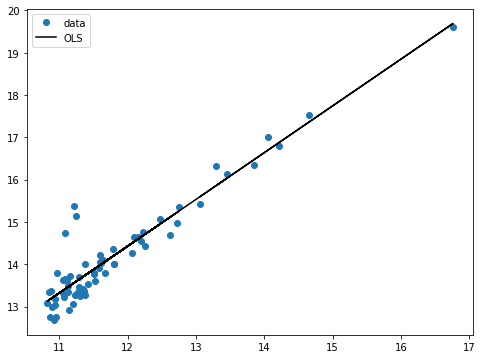

const    1.155684
2003     1.105854
dtype: float64


array([ 0.54296511, -0.1354295 , -0.56150639,  0.12528095,  0.54048993,
       -0.56107049, -0.92865009, -0.12652561,  0.39469932, -0.55746604,
        3.60484665, -0.67088371,  0.14644971, -0.4392213 , -1.08490886,
        0.08905435, -0.69434103, -0.13572541, -1.01660156,  0.16905929,
       -1.32894655, -0.48304134, -0.80305039,  0.54487814,  0.53089517,
       -0.63249014, -0.64890152,  1.19878653,  0.29426971,  0.048168  ,
       -0.44862162, -0.62375296,  4.22800007, -0.24049868,  0.38511975,
        0.647393  , -0.18149305, -0.49908617, -1.23254889, -0.95300311,
        0.24266744,  0.37898615, -0.07602884, -0.18278308, -1.27983592,
        0.2666159 ,  0.21088531,  0.13172127,  0.40748136,  3.06395869,
       -0.51798122, -0.2349703 , -0.43993533, -1.08340551, -0.66269806,
       -0.23050762,  0.40579271, -0.19026865,  0.72984581, -0.34134597,
        1.10754159,  0.22132255, -0.42870786])

In [324]:
x_2003=pop_500['2003']
y_2003=pib_500['2003']

x_2003_ = sm.add_constant(x_2003)

linear_model_2003 = sm.OLS(y_2003,x_2003_)
result_2003 = linear_model_2003.fit()
print(result_2003.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2003, y_2003,'o', label="data")
ax.plot(x_2003, result_2003.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2003')
plt.show()


print(result_2003.params)

influence_2003 = result_2003.get_influence()
standardized_residuals_2003 = influence_2003.resid_studentized_internal

standardized_residuals_2003

                            OLS Regression Results                            
Dep. Variable:                   2004   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     547.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           3.75e-32
Time:                        00:28:08   Log-Likelihood:                -32.755
No. Observations:                  63   AIC:                             69.51
Df Residuals:                      61   BIC:                             73.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1010      0.567      1.942      0.0

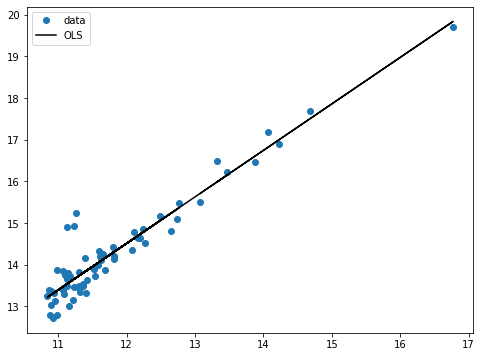

array([ 0.9051843 ,  0.01217572, -0.59017669, -0.11464822,  0.32920894,
       -0.57435957, -0.99530411, -0.13368525,  0.22654168, -0.59065715,
        3.80627495, -0.66198799,  0.31309702, -0.39351714, -1.25253119,
        0.06405463, -0.46112994, -0.20357705, -1.03205866,  0.6628515 ,
       -1.39770373, -0.25304272, -0.66487663,  0.63394651,  0.361713  ,
       -0.6844925 , -0.76135936,  1.20722005,  0.27429568,  0.59271519,
       -0.57283731, -0.68841584,  3.15534642, -0.12144558,  0.33751433,
        0.79481467, -0.21211093, -0.5343413 , -1.41518777, -1.15234791,
        0.30437357,  0.2749612 ,  0.06063953, -0.24648514, -1.45077986,
        0.36816958,  0.19276992,  0.22375182,  0.35738817,  3.37325921,
       -0.61097549, -0.19149839, -0.46488517, -1.19149594, -0.60030827,
       -0.38560624,  0.50240069, -0.29574471,  0.91486055, -0.33251314,
        1.29550098,  0.17450203, -0.50774254])

In [323]:
x_2004=pop_500['2004']
y_2004=pib_500['2004']

x_2004_ = sm.add_constant(x_2004)

linear_model_2004 = sm.OLS(y_2004,x_2004_)
result_2004 = linear_model_2004.fit()
print(result_2004.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2004, y_2004,'o', label="data")
ax.plot(x_2004, result_2004.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2004')
plt.show()

influence_2004 = result_2004.get_influence()
standardized_residuals_2004 = influence_2004.resid_studentized_internal

standardized_residuals_2004

                            OLS Regression Results                            
Dep. Variable:                   2005   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     704.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           3.34e-35
Time:                        00:28:01   Log-Likelihood:                -25.804
No. Observations:                  63   AIC:                             55.61
Df Residuals:                      61   BIC:                             59.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9556      0.508      1.880      0.0

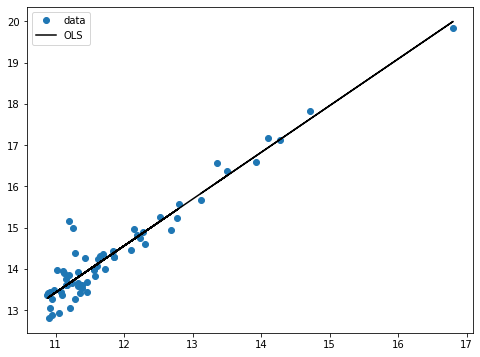

array([ 1.11469290e+00, -2.94033628e-01, -5.98764935e-01,  1.52719977e-01,
        4.07063758e-01, -7.08674003e-01, -1.13415596e+00, -8.45421825e-02,
        2.85965514e-01, -5.17027235e-01,  1.72863514e+00, -6.99387144e-01,
        4.24473715e-01, -3.12242425e-01, -1.37643061e+00,  2.52529604e-01,
       -1.46612101e-01, -2.28447308e-01, -1.09416275e+00,  2.94406548e-01,
       -1.68127892e+00, -3.02239163e-01, -8.99336447e-01,  9.02559215e-01,
        5.41693143e-01, -6.83868568e-01, -6.93138802e-01,  1.39522233e+00,
        2.55644368e-01, -1.15279715e-02, -3.48605615e-01, -7.83477099e-01,
        3.47283128e+00, -1.69142168e-02,  1.26005612e-01,  9.72256005e-01,
       -2.51594266e-01,  2.37004831e-01, -1.51608004e+00, -1.38022317e+00,
        3.03021516e-01,  4.11080347e-01,  2.31551123e-01, -1.89247829e-01,
       -1.33800932e+00,  7.14712035e-01,  4.35048465e-02,  3.84827720e-01,
        3.06749651e-01,  4.09990025e+00, -7.85538690e-01, -1.67594091e-01,
       -4.34661198e-01, -

In [322]:
x_2005=pop_500['2005']
y_2005=pib_500['2005']

x_2005_ = sm.add_constant(x_2005)

linear_model_2005 = sm.OLS(y_2005,x_2005_)
result_2005 = linear_model_2005.fit()
print(result_2005.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2005, y_2005,'o', label="data")
ax.plot(x_2005, result_2005.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2005')
plt.show()

influence_2005 = result_2005.get_influence()
standardized_residuals_2005 = influence_2005.resid_studentized_internal

standardized_residuals_2005

                            OLS Regression Results                            
Dep. Variable:                   2006   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     638.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           5.26e-34
Time:                        00:27:53   Log-Likelihood:                -28.438
No. Observations:                  63   AIC:                             60.88
Df Residuals:                      61   BIC:                             65.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1616      0.530      2.191      0.0

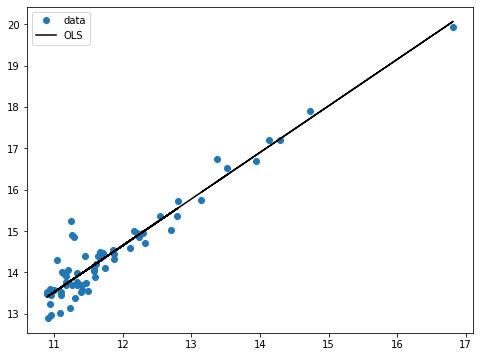

array([ 0.91894331, -0.03293878, -0.48849965,  0.19099954,  0.57448406,
       -0.79315905, -1.10885437, -0.0402665 ,  0.3785562 , -0.437197  ,
        2.65081557, -0.78174911,  0.36521324, -0.18834898, -1.40064238,
        0.15952326, -0.32861812, -0.29181916, -1.11857636,  0.3756285 ,
       -1.73088869, -0.45517646, -1.06007297,  0.81726918,  0.79470276,
       -0.65470122, -0.74832817,  1.91962061,  0.27165805,  0.10291863,
       -0.35443843, -0.77138554,  2.80977681, -0.05490452,  0.12422198,
        0.93244965, -0.33621695,  0.14823335, -1.60242077, -1.39720857,
        0.4470119 ,  0.52459876,  0.16668732, -0.19855776, -1.34229924,
        0.4665547 , -0.06690146,  0.21170749,  0.31733972,  3.78214971,
       -0.57039056, -0.28549649, -0.50981105, -1.29241771, -0.53445297,
       -0.38942635,  0.47379924, -0.0386792 ,  0.4553457 , -0.36667525,
        1.46026542,  0.41997124, -0.50609541])

In [321]:
x_2006=pop_500['2006']
y_2006=pib_500['2006']

x_2006_ = sm.add_constant(x_2006)

linear_model_2006 = sm.OLS(y_2006,x_2006_)
result_2006 = linear_model_2006.fit()
print(result_2006.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2006, y_2006,'o', label="data")
ax.plot(x_2006, result_2006.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2006')
plt.show()


influence_2006 = result_2006.get_influence()
standardized_residuals_2006 = influence_2006.resid_studentized_internal

standardized_residuals_2006

                            OLS Regression Results                            
Dep. Variable:                   2007   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     648.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           3.43e-34
Time:                        00:27:46   Log-Likelihood:                -29.020
No. Observations:                  63   AIC:                             62.04
Df Residuals:                      61   BIC:                             66.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0143      0.535      1.894      0.0

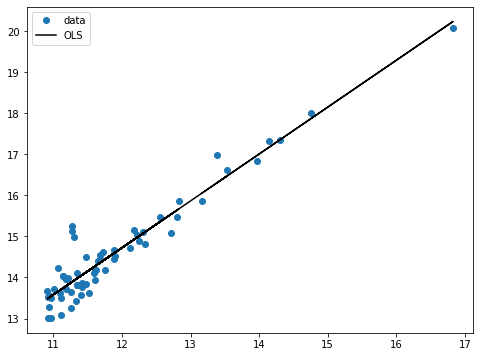

array([ 0.78367587, -0.07626313, -0.36421109,  0.15113168,  0.46514837,
       -0.740935  , -1.20217373, -0.28674864,  0.05837105, -0.42718195,
        2.77292675, -0.89153249,  0.58735414, -0.18931339, -1.43875193,
        0.22295856, -0.56864058, -0.19460055, -1.22699928,  0.18496278,
       -1.61630109, -0.40695196, -0.76581839,  0.73247002,  0.38287348,
       -0.67984707, -0.51405994,  1.48847233,  0.29322694,  0.44411308,
       -0.38334991, -0.72850461,  3.21129335, -0.14942371,  0.2039732 ,
        1.00110426, -0.40065199,  0.36335181, -1.61025988, -1.2634679 ,
        0.48237817,  0.426411  ,  0.08715835, -0.31706573, -1.36723159,
        0.62427001,  0.04069431,  0.33244156,  0.48582403,  3.5221197 ,
       -0.63649446, -0.22011683, -0.51776506, -1.35366083, -0.42261484,
       -0.53066616,  0.36173507, -0.0130317 ,  0.41562972, -0.34232968,
        1.79348609,  0.38169901, -0.50084357])

In [320]:
x_2007=pop_500['2007']
y_2007=pib_500['2007']

x_2007_ = sm.add_constant(x_2007)

linear_model_2007 = sm.OLS(y_2007,x_2007_)
result_2007 = linear_model_2007.fit()
print(result_2007.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2007, y_2007,'o', label="data")
ax.plot(x_2007, result_2007.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2007')
plt.show()

influence_2007 = result_2007.get_influence()
standardized_residuals_2007 = influence_2007.resid_studentized_internal

standardized_residuals_2007

                            OLS Regression Results                            
Dep. Variable:                   2008   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     655.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           2.53e-34
Time:                        00:27:38   Log-Likelihood:                -29.545
No. Observations:                  63   AIC:                             63.09
Df Residuals:                      61   BIC:                             67.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0396      0.535      1.944      0.0

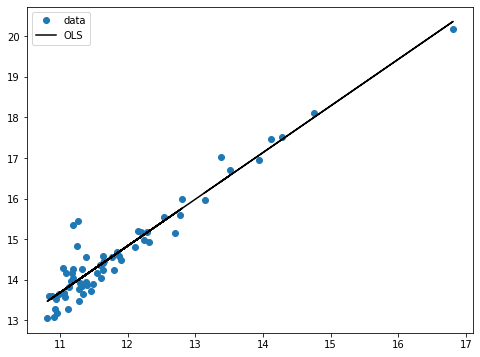

array([ 9.49605812e-01, -2.46519274e-01, -3.62306764e-01,  2.94531636e-01,
        3.97204718e-01, -8.96765000e-01, -1.08201183e+00, -4.11438760e-01,
       -9.70038415e-02, -3.32902555e-01,  2.17312877e+00, -8.60113476e-01,
        2.58338574e-02, -2.49891567e-01, -1.24033104e+00,  6.57847913e-02,
       -6.25884109e-01, -1.81150885e-01, -1.27068317e+00,  2.71466406e-03,
       -1.35415369e+00, -5.60211091e-01, -7.02657533e-01,  7.27196171e-01,
        3.41748524e-01, -9.10135655e-01, -4.73614824e-01,  1.45561987e+00,
        2.31557593e-01,  9.36335827e-01, -5.19295739e-01, -7.03575767e-01,
        3.78648307e+00, -2.32613532e-02,  8.05460345e-02,  1.14287902e+00,
       -3.87735130e-01, -8.78975048e-02, -1.14970432e+00, -1.05837611e+00,
        5.91342393e-01,  2.57978428e-01,  2.66017205e-01, -3.43567446e-01,
       -1.27388238e+00,  5.16767492e-01,  1.13413276e-02,  5.02710278e-01,
        1.65614971e-01,  3.74832643e+00, -7.88702793e-01,  2.53376346e-02,
       -4.98822686e-01, -

In [319]:
x_2008=pop_500['2008']
y_2008=pib_500['2008']

x_2008_ = sm.add_constant(x_2008)

linear_model_2008 = sm.OLS(y_2008,x_2008_)
result_2008 = linear_model_2008.fit()
print(result_2008.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2008, y_2008,'o', label="data")
ax.plot(x_2008, result_2008.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2008')
plt.show()

influence_2008 = result_2008.get_influence()
standardized_residuals_2008 = influence_2008.resid_studentized_internal

standardized_residuals_2008

                            OLS Regression Results                            
Dep. Variable:                   2009   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     829.7
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           3.22e-37
Time:                        00:27:30   Log-Likelihood:                -21.545
No. Observations:                  63   AIC:                             47.09
Df Residuals:                      61   BIC:                             51.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2686      0.471      2.696      0.0

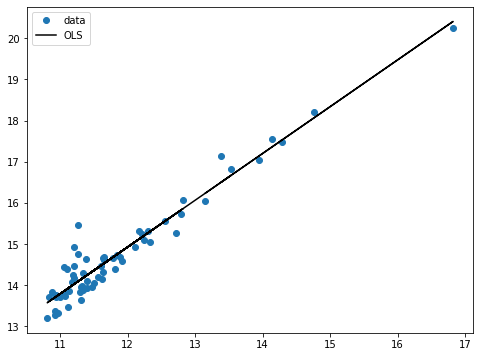

array([ 1.45510592,  0.11982666, -0.4040594 ,  0.25036015,  0.49306584,
       -0.90522876, -0.86190615, -0.57533236, -0.04534522, -0.27785338,
        1.9313158 , -0.96070639, -0.04759679, -0.33172984, -1.08650335,
        0.22824775, -0.81289634, -0.17910752, -1.39564097,  0.44008207,
       -1.33846642, -0.68449089, -0.92749045,  0.68197694,  0.44307472,
       -0.97609091, -0.38079638,  1.72269881,  0.04803943,  1.31736791,
       -0.48322532, -0.72646003,  4.00079365, -0.22047321, -0.03961592,
        1.19713522, -0.64152331, -0.23892327, -1.21780245, -1.08580632,
        0.64873518,  0.27573927,  0.27111147, -0.29183998, -1.20961696,
        0.61849817,  0.15930785,  0.35005955,  0.52402555,  2.6473671 ,
       -0.95749487, -0.0358989 , -0.36711187, -1.41953899, -0.55375592,
       -0.55841105,  0.44125415, -0.12883868,  0.59882341, -0.28406056,
        1.85720699,  0.43815773, -0.54726651])

In [318]:
x_2009=pop_500['2009']
y_2009=pib_500['2009']

x_2009_ = sm.add_constant(x_2009)

linear_model_2009 = sm.OLS(y_2009,x_2009_)
result_2009 = linear_model_2009.fit()
print(result_2009.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_2009, y_2009,'o', label="data")
ax.plot(x_2009, result_2009.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2009')
plt.show()

influence_2009 = result_2009.get_influence()
standardized_residuals_2009 = influence_2009.resid_studentized_internal

standardized_residuals_2009

                            OLS Regression Results                            
Dep. Variable:                   2010   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     822.4
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           4.14e-37
Time:                        00:27:21   Log-Likelihood:                -21.696
No. Observations:                  63   AIC:                             47.39
Df Residuals:                      61   BIC:                             51.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4863      0.470      3.162      0.0

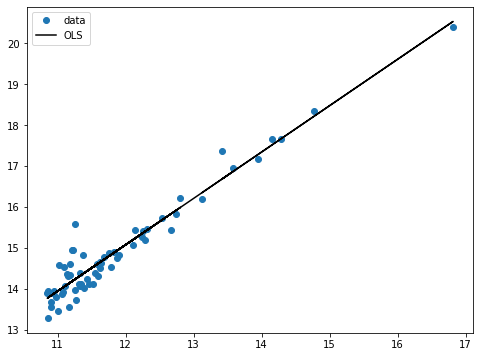

array([ 1.37290885e+00,  1.53016567e-01, -3.76304768e-01,  1.42091448e-01,
        1.46402776e-01, -1.00293384e+00, -7.23295713e-01, -4.28186394e-01,
        1.71555963e-01, -2.96090712e-01,  2.18716555e+00, -9.07921823e-01,
        2.03793602e-01, -3.56667875e-01, -1.22073473e+00, -1.00287970e-01,
       -7.42523804e-01, -2.94705682e-01, -1.17412123e+00, -3.54882635e-03,
       -1.70097880e+00, -5.45275536e-01, -1.06156396e+00,  7.96679175e-01,
        5.39150563e-01, -8.58053362e-01, -5.66178664e-01,  1.74805320e+00,
        1.36864905e-01,  1.33038203e+00, -5.71238468e-01, -6.33799830e-01,
        3.96025646e+00, -3.31719414e-03,  2.22036046e-02,  1.34483617e+00,
       -4.78370112e-01, -3.52395516e-01, -1.42537069e+00, -1.45805085e+00,
        6.41742316e-01,  5.78388070e-01,  3.52610603e-01, -2.51814302e-01,
       -4.34534597e-01,  5.77133479e-01,  7.40130503e-02,  2.03260103e-01,
        4.49818019e-01,  2.26031104e+00, -7.58151294e-01,  3.33720091e-02,
       -3.84818357e-01, -

In [317]:
x_2010=pop_500['2010']
y_2010=pib_500['2010']

x_2010_ = sm.add_constant(x_2010)

linear_model_2010 = sm.OLS(y_2010,x_2010_)
result_2010 = linear_model_2010.fit()
print(result_2010.summary())

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_2010, y_2010,'o', label="data")
ax.plot(x_2010, result_2010.fittedvalues, 'black', label="OLS")
ax.legend(loc='best')
plt.savefig('reg_2010')
plt.show()


influence_2010 = result_2010.get_influence()
standardized_residuals_2010 = influence_2010.resid_studentized_internal

standardized_residuals_2010

In [145]:
delta_1 = abs(standardized_residuals_2003)+abs(standardized_residuals_2004)

In [146]:
delta_2 = abs(standardized_residuals_2004)+abs(standardized_residuals_2005)

In [147]:
delta_3 = abs(standardized_residuals_2005)+abs(standardized_residuals_2006)

In [148]:
delta_4 = abs(standardized_residuals_2006)+abs(standardized_residuals_2007)

In [149]:
delta_5 = abs(standardized_residuals_2007)+abs(standardized_residuals_2008)

In [150]:
delta_6 = abs(standardized_residuals_2008)+abs(standardized_residuals_2009)

In [151]:
delta_7 = abs(standardized_residuals_2009)+abs(standardized_residuals_2010)

In [155]:
delta_1

array([1.44814941, 0.14760522, 1.15168307, 0.23992917, 0.86969888,
       1.13543006, 1.92395421, 0.26021086, 0.62124101, 1.14812319,
       7.4111216 , 1.3328717 , 0.45954673, 0.83273844, 2.33744005,
       0.15310898, 1.15547097, 0.33930246, 2.04866022, 0.83191079,
       2.72665028, 0.73608406, 1.46792702, 1.17882465, 0.89260817,
       1.31698263, 1.41026088, 2.40600658, 0.56856539, 0.64088319,
       1.02145894, 1.3121688 , 7.38334648, 0.36194426, 0.72263408,
       1.44220767, 0.39360397, 1.03342747, 2.64773666, 2.10535102,
       0.54704102, 0.65394735, 0.13666837, 0.42926822, 2.73061579,
       0.63478548, 0.40365523, 0.35547309, 0.76486953, 6.4372179 ,
       1.12895671, 0.4264687 , 0.9048205 , 2.27490145, 1.26300633,
       0.61611387, 0.9081934 , 0.48601337, 1.64470636, 0.67385911,
       2.40304257, 0.39582458, 0.9364504 ])

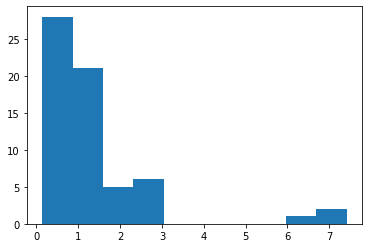

In [178]:
plt.hist(delta_1)
plt.savefig("hist_2003-2004.png")
plt.show()

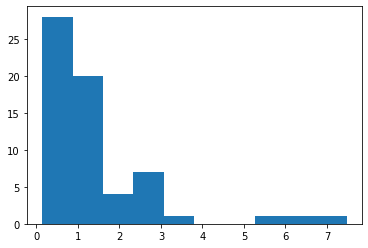

In [180]:
plt.hist(delta_2)
plt.savefig('hist_2004-2005')
plt.show()

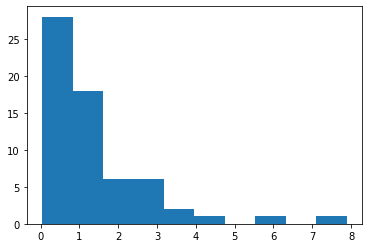

In [181]:
plt.hist(delta_3)
plt.savefig('hist_2005-2006')
plt.show()

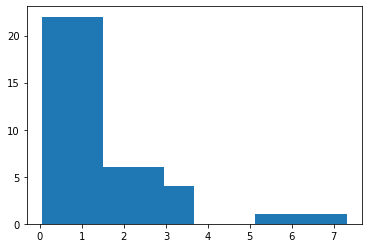

In [186]:
plt.hist(delta_4)
plt.savefig('hist_2006-2007')
plt.show()

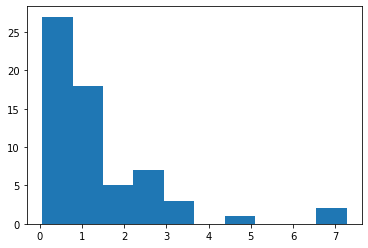

In [187]:
plt.hist(delta_5)
plt.savefig('hist_2007-2008')
plt.show()

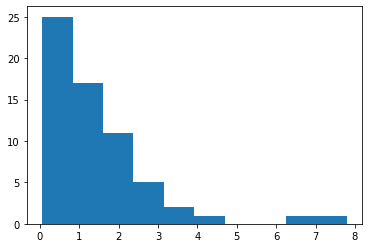

In [188]:
plt.hist(delta_6)
plt.savefig('hist_2008-2009')
plt.show()

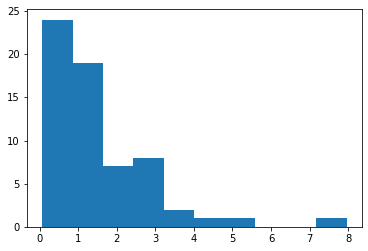

In [189]:
plt.hist(delta_7)
plt.savefig('hist_2009-2010')
plt.show()

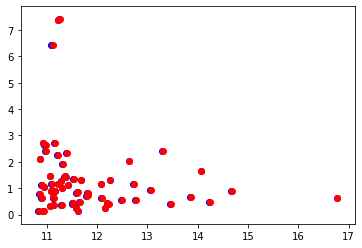

In [221]:
plt.scatter(pop_500['2003'], delta_1, c='blue')
plt.scatter(pop_500['2004'], delta_1, c='red')
plt.savefig('2003-2004-delta 1')
plt.show()

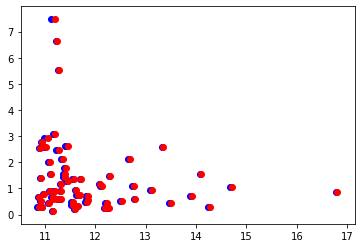

In [228]:
plt.scatter(pop_500['2004'], delta_2, c='blue')
plt.scatter(pop_500['2005'], delta_2, c='red')
plt.savefig('2004-2005-delta 2')
plt.show()

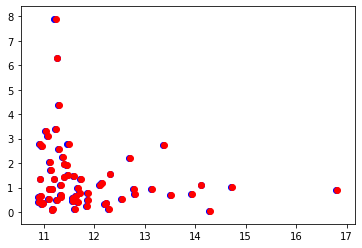

In [229]:
plt.scatter(pop_500['2005'], delta_3, c='blue')
plt.scatter(pop_500['2006'], delta_3, c='red')
plt.savefig('2004-2005-delta 3')
plt.show()

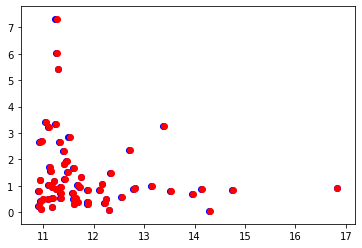

In [230]:
plt.scatter(pop_500['2006'], delta_4, c='blue')
plt.scatter(pop_500['2007'], delta_4, c='red')
plt.savefig('2006-2007-delta 4')
plt.show()

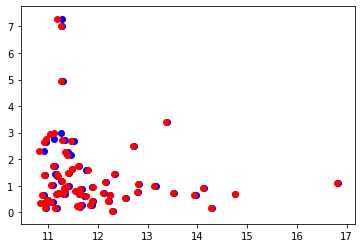

In [231]:
plt.scatter(pop_500['2007'], delta_5, c='blue')
plt.scatter(pop_500['2008'], delta_5, c='red')
plt.savefig('2007-2008-delta 5')
plt.show()

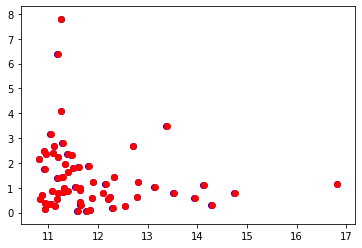

In [232]:
plt.scatter(pop_500['2008'], delta_6, c='blue')
plt.scatter(pop_500['2009'], delta_6, c='red')
plt.savefig('2008-2009-delta 6')
plt.show()

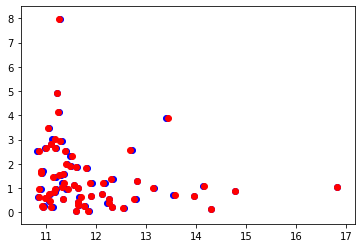

In [233]:
plt.scatter(pop_500['2009'], delta_7, c='blue')
plt.scatter(pop_500['2010'], delta_7, c='red')
plt.savefig('2009-2010-delta 7')
plt.show()

In [235]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,11.056651,11.071346,11.103769,11.119927,11.135771,11.089286,11.096364,11.094816,NaN,350190.0,Amparo
1,10.933268,10.938059,10.948752,10.954187,10.959488,10.942084,10.943694,10.921143,NaN,350210.0,Andradina
2,12.069101,12.078381,12.099139,12.109545,12.119785,12.107042,12.112888,12.109446,NaN,350280.0,Araçatuba
3,12.152867,12.164724,12.191162,12.204356,12.217260,12.201723,12.209392,12.248471,NaN,350320.0,Araraquara
4,11.602346,11.617114,11.649927,11.666196,11.682136,11.640835,11.648452,11.685559,NaN,350330.0,Araras
...,...,...,...,...,...,...,...,...,...,...,...
58,14.057858,14.073240,14.107307,14.124227,14.140723,14.122362,14.132569,14.146649,NaN,2122970.0,São José dos Campos
59,13.853960,13.874463,13.919541,13.941724,13.963257,13.936239,13.949582,13.953562,NaN,3179510.0,Sorocaba
60,13.297717,13.314936,13.352978,13.371811,13.390136,13.373580,13.385377,13.422286,NaN,2115170.0,Jundiaí
61,13.452457,13.467181,13.499819,13.516041,13.531871,13.519163,13.529365,13.581426,NaN,1417170.0,Ribeirão Preto


In [243]:
cidades = pop_500['Município']

In [252]:
cidades = cidades.tolist()
type(cidades)

list

In [248]:
len(standardized_residuals_2010)

63

In [249]:
len(delta_1)

63

In [286]:
lista_de_residuos = [cidades,
                  standardized_residuals_2003,
                  standardized_residuals_2004,
                  standardized_residuals_2005,
                  standardized_residuals_2006,
                  standardized_residuals_2007,
                  standardized_residuals_2008,
                  standardized_residuals_2009,
                  standardized_residuals_2010]
data_1 = {z[0]:list(z[1:]) for z in zip(*lista_de_residuos)}

In [287]:
data_1 = pd.DataFrame(data_1)

In [288]:
data_1 = data_1.T

In [289]:
data_1.columns = ['res_2003','res_2004','res_2005','res_2006','res_2007','res_2008','res_2009','res_2010']

In [290]:
data_1['Município'] = data_1.index
data_1 = data_1.reset_index(drop=True)

In [294]:
data_1 = data_1[['Município','res_2003','res_2004','res_2005','res_2006','res_2007','res_2008','res_2009','res_2010']]

In [295]:
data_1.head()

,Município,res_2003,res_2004,res_2005,res_2006,res_2007,res_2008,res_2009,res_2010
0,Amparo,0.542965,0.905184,1.114693,0.918943,0.783676,0.949606,1.455106,1.372909
1,Andradina,-0.135429,0.012176,-0.294034,-0.032939,-0.076263,-0.246519,0.119827,0.153017
2,Araçatuba,-0.561506,-0.590177,-0.598765,-0.488500,-0.364211,-0.362307,-0.404059,-0.376305
3,Araraquara,0.125281,-0.114648,0.152720,0.191000,0.151132,0.294532,0.250360,0.142091
4,Araras,0.540490,0.329209,0.407064,0.574484,0.465148,0.397205,0.493066,0.146403


In [296]:
lista_de_deltas = [cidades,
                  delta_1,
                  delta_2,
                  delta_3,
                  delta_4,
                  delta_5,
                  delta_6,
                  delta_7]
data_2 = {z[0]:list(z[1:]) for z in zip(*lista_de_deltas)}

In [297]:
data_2 = pd.DataFrame(data_2)

In [298]:
data_2 = data_2.T

In [300]:
data_2.columns = ['delta_0304','delta_0405','delta_0506','delta_0607','delta_0708','delta_0809','delta_0910']

In [302]:
data_2['Município'] = data_2.index
data_2=data_2.reset_index(drop=True)

In [303]:
data_2 = data_2[['Município','delta_0304','delta_0405','delta_0506','delta_0607','delta_0708','delta_0809','delta_0910']]

In [304]:
data_2.head()

,Município,delta_0304,delta_0405,delta_0506,delta_0607,delta_0708,delta_0809,delta_0910
0,Amparo,1.448149,2.019877,2.033636,1.702619,1.733282,2.404712,2.828015
1,Andradina,0.147605,0.306209,0.326972,0.109202,0.322782,0.366346,0.272843
2,Araçatuba,1.151683,1.188942,1.087265,0.852711,0.726518,0.766366,0.780364
3,Araraquara,0.239929,0.267368,0.343720,0.342131,0.445663,0.544892,0.392452
4,Araras,0.869699,0.736273,0.981548,1.039632,0.862353,0.890271,0.639469


In [325]:
data_1.to_csv('residuos.csv', index=False)

In [326]:
data_2.to_csv('deltas.csv',index=False)